<a href="https://it-omscholing.nl/locaties/hogeschool-rotterdam/">
<div>
<a><img src='../../../pics/banner.PNG'/></a>
</div>
<div>
<img src='../../../pics/miw.PNG'/>
<em>Author: Jeroen Boogaard</em>
</div>
</a>

<h1>Practicum Basis Statistiek / SQL </h1>

<h2>Imports<h2>

In [28]:
!pip list | grep venn

matplotlib-venn          0.11.9


In [29]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2, venn3
from PIL import Image
import pandas as pd
import sqlite3
from pathlib import Path

<h2>Extract, Transform and Load</h2>

<h3>Extract</h3>

In [30]:
# https://raw.githubusercontent.com/ajturner/acetate/master/places/Countries-Europe.csv
eurCsvFile = "../csv/countries_europe.csv"
euCsvFile = "../csv/european_union.csv"

 # Create Pandas DataFrames
europeDF = pd.read_csv(eurCsvFile, sep=',', header=0)
euDF = pd.read_csv(euCsvFile, sep=',', header=0)
db = "europe.db"

In [31]:
benelux = {"Belgium", "The Netherlands", "Luxembourg"}
nordics = {"Denmark", "Finland", "Iceland", "Norway", "Sweden"}
baltics = {"Estonia", "Latvia", "Lithuania"}

<h3>Load</h3>

<p>Maak een lege database</p>

In [32]:
!sqlite3 europe.db "VACUUM;"

**Maak verbinding met de database**

In [33]:
# Connect to SQLite database
dbConnection = sqlite3.connect(db)
dbCursor = dbConnection.cursor()

<p>Maak tabellen <u>countries</u> en <u>eu</u> o.b.v. de dataset</p>

In [34]:
europeDF.to_sql('countries', dbConnection, if_exists='replace', index = False)
euDF.to_sql('eu', dbConnection, if_exists='replace', index = False)

27

**Gebruik een SQL query voor het selecteren van bepaalde kolommen / features****Gebruik een SQL query voor het selecteren van bepaalde kolommen / features**

In [35]:


query = """
    SELECT *
    FROM countries
    WHERE Code='UKR'
"""
result = dbCursor.execute(query).fetchall()
print(result)
print(type(result))

[(3, 'Ukraine', 'Ukr.', 'UKR', 804, 603700.0, 45415596, 49.0, 32.0, 'eu')]
<class 'list'>


<h3>Exercise 1</h3>
<p>
    Gebruik SQL queries voor het <u>joinen</u> van de tabellen <u>countries</u> en <u>eu</u> o.b.v. <u>Code</u>
</p>

In [36]:
# Oplossing
query = """
    SELECT *
    FROM countries
    FULL OUTER JOIN eu
    ON countries.Code = eu.Code
"""
result = dbCursor.execute(query).fetchall()
print(result)
print(type(result))

[(3, 'Ukraine', 'Ukr.', 'UKR', 804, 603700.0, 45415596, 49.0, 32.0, 'eu', None, None, None), (3, 'France', 'Fr.', 'FRA', 250, 547030.0, 64768389, 46.0, 2.0, 'eu', 'FRA', 'France', '1958-01-01'), (3, 'Spain', 'Spain', 'ESP', 724, 504782.0, 46505963, 40.0, -4.0, 'eu', 'ESP', 'Spain', '1986-01-01'), (3, 'Sweden', 'Swe.', 'SWE', 752, 449964.0, 9045000, 62.0, 15.0, 'eu', 'SWE', 'Sweden', '1995-01-01'), (3, 'Germany', 'Ger.', 'DEU', 276, 357021.0, 82369000, 51.5, 10.5, 'eu', 'DEU', 'Germany', '1958-01-01'), (3, 'Finland', 'Fin.', 'FIN', 246, 337030.0, 5244000, 64.0, 26.0, 'eu', 'FIN', 'Finland', '1995-01-01'), (3, 'Norway', 'Nor.', 'NOR', 578, 324220.0, 4907000, 62.0, 10.0, 'eu', None, None, None), (3, 'Poland', 'Pol.', 'POL', 616, 312685.0, 38500000, 52.0, 20.0, 'eu', 'POL', 'Poland', '2004-05-01'), (3, 'Italy', 'Italy', 'ITA', 380, 301230.0, 58145000, 42.83, 12.83, 'eu', 'ITA', 'Italy', '1958-01-01'), (3, 'United Kingdom', 'U.K.', 'GBR', 826, 244820.0, 62348447, 54.9, -3.12, 'eu', None, No

In [37]:
# Oplossing
query = """
    SELECT *
    FROM countries
    INNER JOIN eu
    ON countries.Code = eu.Code
"""
result = dbCursor.execute(query).fetchall()
print(result)
print(type(result))

[(3, 'France', 'Fr.', 'FRA', 250, 547030.0, 64768389, 46.0, 2.0, 'eu', 'FRA', 'France', '1958-01-01'), (3, 'Spain', 'Spain', 'ESP', 724, 504782.0, 46505963, 40.0, -4.0, 'eu', 'ESP', 'Spain', '1986-01-01'), (3, 'Sweden', 'Swe.', 'SWE', 752, 449964.0, 9045000, 62.0, 15.0, 'eu', 'SWE', 'Sweden', '1995-01-01'), (3, 'Germany', 'Ger.', 'DEU', 276, 357021.0, 82369000, 51.5, 10.5, 'eu', 'DEU', 'Germany', '1958-01-01'), (3, 'Finland', 'Fin.', 'FIN', 246, 337030.0, 5244000, 64.0, 26.0, 'eu', 'FIN', 'Finland', '1995-01-01'), (3, 'Poland', 'Pol.', 'POL', 616, 312685.0, 38500000, 52.0, 20.0, 'eu', 'POL', 'Poland', '2004-05-01'), (3, 'Italy', 'Italy', 'ITA', 380, 301230.0, 58145000, 42.83, 12.83, 'eu', 'ITA', 'Italy', '1958-01-01'), (3, 'Romania', 'Rom.', 'ROU', 642, 237500.0, 21959278, 46.0, 25.0, 'eu', 'ROU', 'Romania', '2007-01-01'), (3, 'Greece', 'Grc.', 'GRC', 300, 131940.0, 11000000, 39.0, 22.0, 'eu', 'GRC', 'Greece', '1981-01-01'), (3, 'Bulgaria', 'Blg.', 'BGR', 100, 110910.0, 7148785, 43.0, 

In [38]:
# Oplossing
query = """
    SELECT *
    FROM countries
    LEFT JOIN eu
    ON countries.Code = eu.Code
"""
result = dbCursor.execute(query).fetchall()
print(result)
print(type(result))

[(3, 'Ukraine', 'Ukr.', 'UKR', 804, 603700.0, 45415596, 49.0, 32.0, 'eu', None, None, None), (3, 'France', 'Fr.', 'FRA', 250, 547030.0, 64768389, 46.0, 2.0, 'eu', 'FRA', 'France', '1958-01-01'), (3, 'Spain', 'Spain', 'ESP', 724, 504782.0, 46505963, 40.0, -4.0, 'eu', 'ESP', 'Spain', '1986-01-01'), (3, 'Sweden', 'Swe.', 'SWE', 752, 449964.0, 9045000, 62.0, 15.0, 'eu', 'SWE', 'Sweden', '1995-01-01'), (3, 'Germany', 'Ger.', 'DEU', 276, 357021.0, 82369000, 51.5, 10.5, 'eu', 'DEU', 'Germany', '1958-01-01'), (3, 'Finland', 'Fin.', 'FIN', 246, 337030.0, 5244000, 64.0, 26.0, 'eu', 'FIN', 'Finland', '1995-01-01'), (3, 'Norway', 'Nor.', 'NOR', 578, 324220.0, 4907000, 62.0, 10.0, 'eu', None, None, None), (3, 'Poland', 'Pol.', 'POL', 616, 312685.0, 38500000, 52.0, 20.0, 'eu', 'POL', 'Poland', '2004-05-01'), (3, 'Italy', 'Italy', 'ITA', 380, 301230.0, 58145000, 42.83, 12.83, 'eu', 'ITA', 'Italy', '1958-01-01'), (3, 'United Kingdom', 'U.K.', 'GBR', 826, 244820.0, 62348447, 54.9, -3.12, 'eu', None, No

In [39]:
# Oplossing
query = """
    SELECT *
    FROM countries
    RIGHT JOIN eu
    ON countries.Code = eu.Code
"""
result = dbCursor.execute(query).fetchall()
print(result)
print(type(result))

[(3, 'France', 'Fr.', 'FRA', 250, 547030.0, 64768389, 46.0, 2.0, 'eu', 'FRA', 'France', '1958-01-01'), (3, 'Spain', 'Spain', 'ESP', 724, 504782.0, 46505963, 40.0, -4.0, 'eu', 'ESP', 'Spain', '1986-01-01'), (3, 'Sweden', 'Swe.', 'SWE', 752, 449964.0, 9045000, 62.0, 15.0, 'eu', 'SWE', 'Sweden', '1995-01-01'), (3, 'Germany', 'Ger.', 'DEU', 276, 357021.0, 82369000, 51.5, 10.5, 'eu', 'DEU', 'Germany', '1958-01-01'), (3, 'Finland', 'Fin.', 'FIN', 246, 337030.0, 5244000, 64.0, 26.0, 'eu', 'FIN', 'Finland', '1995-01-01'), (3, 'Poland', 'Pol.', 'POL', 616, 312685.0, 38500000, 52.0, 20.0, 'eu', 'POL', 'Poland', '2004-05-01'), (3, 'Italy', 'Italy', 'ITA', 380, 301230.0, 58145000, 42.83, 12.83, 'eu', 'ITA', 'Italy', '1958-01-01'), (3, 'Romania', 'Rom.', 'ROU', 642, 237500.0, 21959278, 46.0, 25.0, 'eu', 'ROU', 'Romania', '2007-01-01'), (3, 'Greece', 'Grc.', 'GRC', 300, 131940.0, 11000000, 39.0, 22.0, 'eu', 'GRC', 'Greece', '1981-01-01'), (3, 'Bulgaria', 'Blg.', 'BGR', 100, 110910.0, 7148785, 43.0, 

<h2>Afhankelijke en onafhankelijke variabelen</h2>

<h3>Overlappende uitkomsten</h3>

In [40]:
eu = {"Austria", "Belgium", "Bulgaria", "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Ireland", "Italy", "Latvia", "Lithuania", "Luxembourg", "Malta", "The Netherlands", "Poland", "Portugal", "Romania", "Slovakia", "Slovenia", "Spain", "Sweden"}
benelux = {"Belgium", "The Netherlands", "Luxembourg"}
nordics = {"Denmark", "Finland", "Iceland", "Norway", "Sweden"}
baltics = {"Estonia", "Latvia", "Lithuania"}

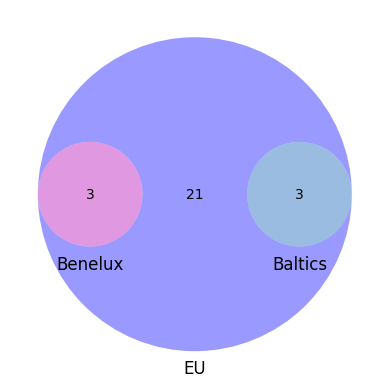

In [41]:
venn3([benelux, baltics, eu], ('Benelux', 'Baltics', 'EU'))

<h3>Exercise 2</h3>
<p>
    Gebruik SQL queries voor het verkrijgen van
<ol>
    <li>P(Nordics); de kans dat een Europees land onderdeel is van de Nordics</li>
    <li><u>P(EU)</u>; de kans dat een Europees land lid is van de Europese Unie</li>
    <li><u>P(EU and Nordics)</u>; de kans dat een land onderdeel is van de Norics en lid is van de EU</li>
</ol>
Bereken met bovenstaande gegevens P(EU|Nordics); de kans dat een Europees land lid is van de Europese Unie gegeven dat het in de Nordics</li>
</p>

In [43]:
def group_add (row):
    if row["name"] in {"Belgium", "Netherlands", "Luxembourg"}:
        return "benelux"
    if row["name"] in {"Denmark", "Finland", "Iceland", "Norway", "Sweden"}:
        return "nordics"
    if row["name"] in {"Estonia", "Latvia", "Lithuania"}:
        return "baltics"
    return "others"
europeDF['groups'] = europeDF.apply (lambda row: group_add(row), axis=1)
europeDF.to_csv("C:/Users/Lenovo/MakeAIWork3/practica/csv/groups.csv")
#euDF.to_csv("C:/Users/Lenovo/MakeAIWork3/practica/csv/groups.csv")
europeDF.to_sql('countries', dbConnection, if_exists='replace', index = False)

display(europeDF)

,zoom,name,abbreviation,Code,ISO numeric,land area km,population,latitude,longitude,continent,groups
0,3,Ukraine,Ukr.,UKR,804,603700.0,45415596,49.00,32.00,eu,others
1,3,France,Fr.,FRA,250,547030.0,64768389,46.00,2.00,eu,others
2,3,Spain,Spain,ESP,724,504782.0,46505963,40.00,-4.00,eu,others
3,3,Sweden,Swe.,SWE,752,449964.0,9045000,62.00,15.00,eu,nordics
4,3,Germany,Ger.,DEU,276,357021.0,82369000,51.50,10.50,eu,others
5,3,Finland,Fin.,FIN,246,337030.0,5244000,64.00,26.00,eu,nordics
6,3,Norway,Nor.,NOR,578,324220.0,4907000,62.00,10.00,eu,nordics
7,3,Poland,Pol.,POL,616,312685.0,38500000,52.00,20.00,eu,others
8,3,Italy,Italy,ITA,380,301230.0,58145000,42.83,12.83,eu,others
9,3,United Kingdom,U.K.,GBR,826,244820.0,62348447,54.90,-3.12,eu,others


In [46]:
# Close connection to SQLite database

query = """ 
    SELECT count(*)
    FROM countries 
    WHERE groups = 'nordics'
    """   
result = dbCursor.execute(query).fetchall()
print(result)
print(type(result))


[(5,)]
<class 'list'>


In [47]:
query = """ 
    SELECT count(*)
    FROM countries 
    WHERE groups = 'nordics'
    """   
result = dbCursor.execute(query).fetchall()
print(result)
print(type(result))

[(5,)]
<class 'list'>


In [ ]:
dbCursor = dbConnection.cursor()